In [77]:
#Load the Data
import pandas as pd

df = pd.read_csv("../yfinance_data/raw_analyst_ratings.csv")  
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


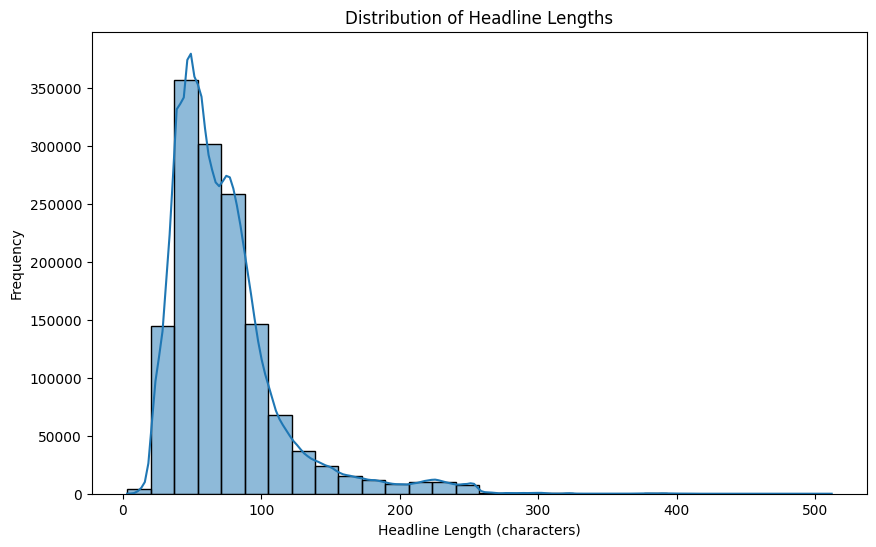

In [78]:
# Calculate headline length (number of characters)
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic stats for headline length
print(df['headline_length'].describe())

# Optional: Visualize headline length distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


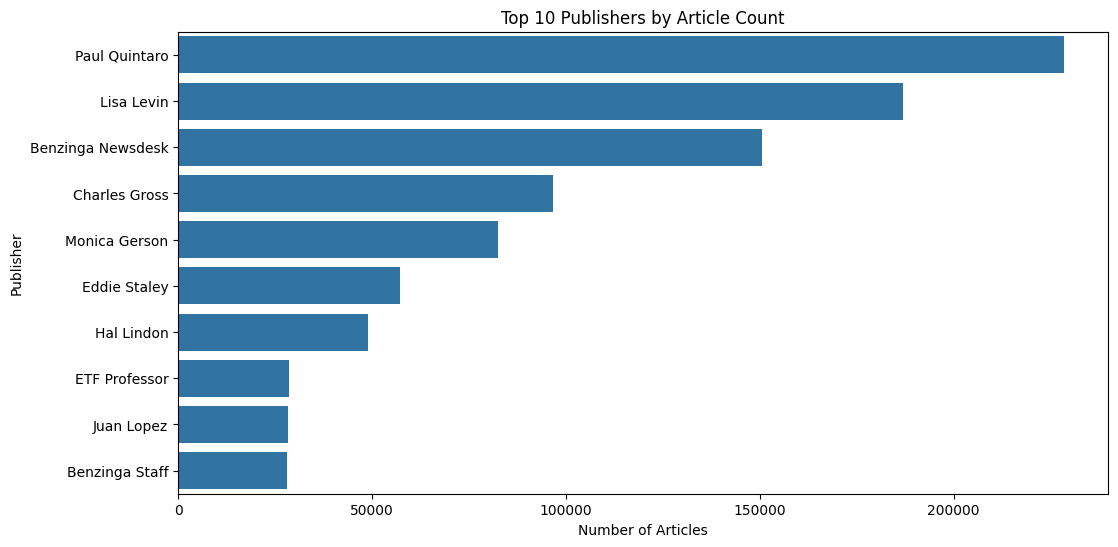

In [79]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers

# Visualize top publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

Missing dates after conversion: 1351341


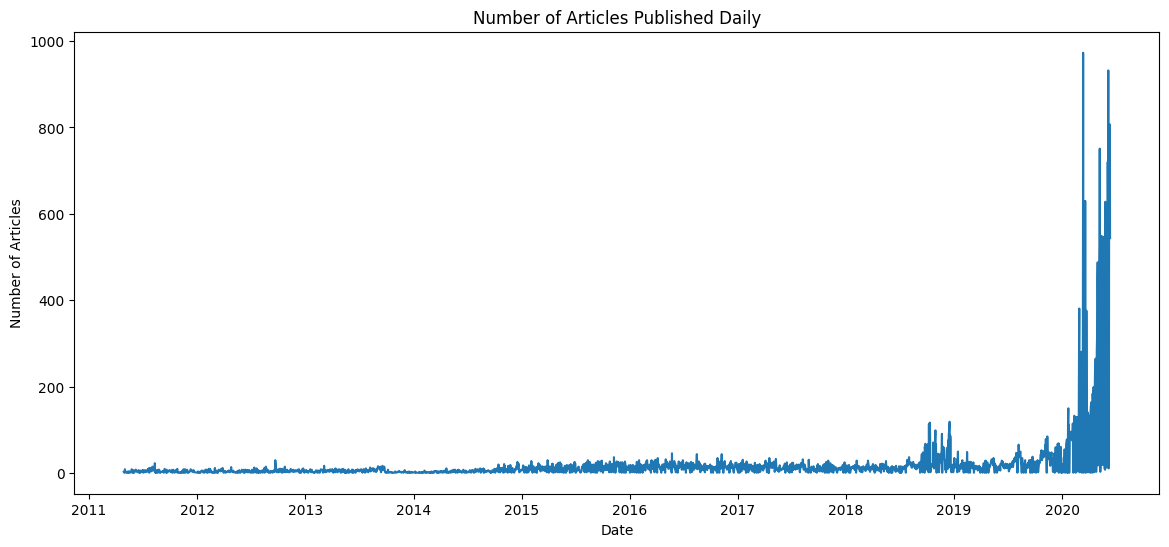

In [80]:
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
print("Missing dates after conversion:", df['date'].isna().sum())
df = df.dropna(subset=['date'])
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

daily_counts = df.groupby('date_only').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title('Number of Articles Published Daily')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [81]:
print(df['date'].head(20))      # Check first 20 rows
print(df['date'].sample(20))   # Check random 20 rows

0      2020-06-05 14:30:54+00:00
1      2020-06-03 14:45:20+00:00
2      2020-05-26 08:30:07+00:00
3      2020-05-22 16:45:06+00:00
4      2020-05-22 15:38:59+00:00
5      2020-05-22 15:23:25+00:00
6      2020-05-22 13:36:20+00:00
7      2020-05-22 13:07:04+00:00
8      2020-05-22 12:37:59+00:00
9      2020-05-22 12:06:17+00:00
1433   2020-06-09 14:52:15+00:00
1434   2020-06-08 15:29:29+00:00
1435   2020-06-08 14:32:42+00:00
1436   2020-06-05 11:40:08+00:00
1437   2020-06-04 18:46:13+00:00
1438   2020-06-03 14:19:06+00:00
1439   2020-05-27 14:10:20+00:00
1440   2020-05-27 11:32:46+00:00
1441   2020-05-26 11:47:48+00:00
1442   2020-05-18 14:50:11+00:00
Name: date, dtype: datetime64[ns, UTC]
1175085   2020-02-03 16:44:05+00:00
31297     2020-04-21 15:47:07+00:00
748565    2020-02-18 16:03:44+00:00
911983    2016-11-08 12:16:36+00:00
1268358   2020-02-24 09:53:26+00:00
902936    2020-02-13 10:45:24+00:00
1340673   2020-04-13 11:40:25+00:00
1130279   2013-04-26 10:56:23+00:00
803335    202

In [82]:
print(df['date'].dtype)
print(df['date'].unique()[:10])

datetime64[ns, UTC]
<DatetimeArray>
['2020-06-05 14:30:54+00:00', '2020-06-03 14:45:20+00:00',
 '2020-05-26 08:30:07+00:00', '2020-05-22 16:45:06+00:00',
 '2020-05-22 15:38:59+00:00', '2020-05-22 15:23:25+00:00',
 '2020-05-22 13:36:20+00:00', '2020-05-22 13:07:04+00:00',
 '2020-05-22 12:37:59+00:00', '2020-05-22 12:06:17+00:00']
Length: 10, dtype: datetime64[ns, UTC]


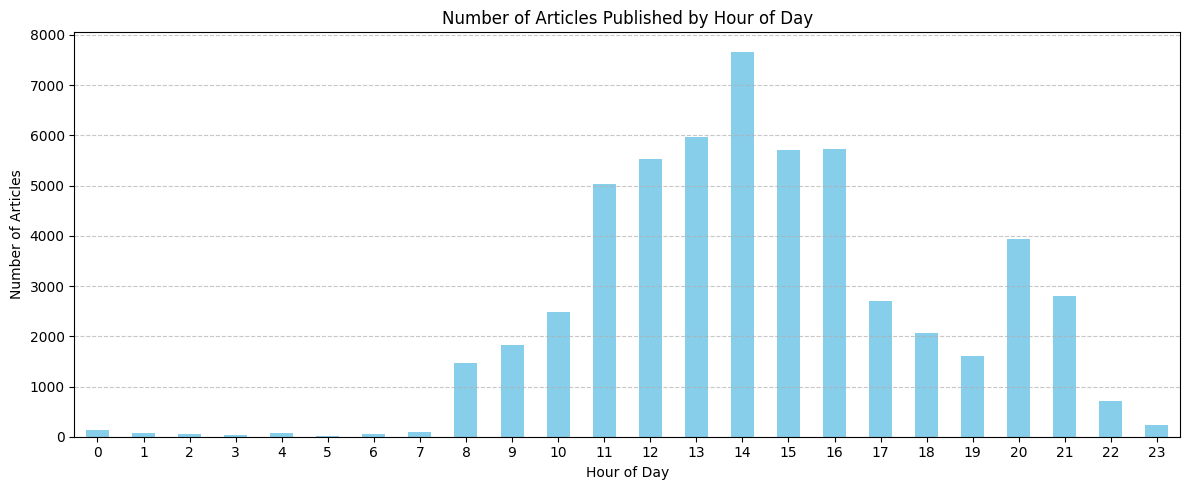

In [83]:
# Convert date column to datetime if not already done
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the hour of publication
df['hour'] = df['date'].dt.hour

# Count articles by hour
hourly_counts = df.groupby('hour').size()

# Plot
plt.figure(figsize=(12,5))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [84]:
import nltk
print(nltk.data.path)


['C:\\Users\\fre/nltk_data', 'd:\\AI-projects\\Solar-Challenge-Week1\\.venv\\nltk_data', 'd:\\AI-projects\\Solar-Challenge-Week1\\.venv\\share\\nltk_data', 'd:\\AI-projects\\Solar-Challenge-Week1\\.venv\\lib\\nltk_data', 'C:\\Users\\fre\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["This is the first document.", "Here is the second one."]

# Example tokenization (simple split)
texts = [doc.split() for doc in documents]

# Join tokens back into strings
joined_texts = [' '.join(tokens) for tokens in texts]

# Continue with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(joined_texts)

print(X.shape)


(2, 8)
